# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [44]:
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('max_colwidth', 800)
import re 

In [45]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [46]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [47]:
import requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [48]:
with open("image_predictions.tsv", mode='wb') as file:
    file.write(response.content)

In [49]:
image_pred = pd.read_csv('image_predictions.tsv', sep='\t')

In [50]:
image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [51]:
tweet_json = pd.read_json('tweet_json.txt', lines=True)

In [52]:
tweet_json.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,place,possibly_sensitive,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}",39467,False,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,892420643555336193,892420643555336192,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Ratings | STORE: @ShopWeRateDogs | IG, FB & SC: WeRateDogs MOBILE APP: @GoodDogsGame | Business: dogratingtwitter@gmail.com', 'url': 'https://t.co/N7sNNHAEXS', 'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHAEXS', 'expanded_url': 'http://weratedogs.com', 'display_url': 'weratedogs.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 3200889, 'friends_count': 104, 'listed_count': 2784, 'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'favourites_count': 114031, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statu..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co/0Xxu71qeIV', 'display_url': 'pic.twitter.com/0Xxu71qeIV', 'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 1407, 'h': 1600, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 598, 'h': 680, 'resize': 'fit'}, 'medium': {'w': 1055, 'h': 1200, 'resize': 'fit'}}}]}","{'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co/0Xxu71qeIV', 'display_url': 'pic.twitter.com/0Xxu71qeIV', 'expanded_url': 'https://twitter.com/dog_rates/status/89217742130634342

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [379]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [380]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [381]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [382]:
image_pred['p1'].value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Staffordshire_bullterrier     20
Siberian_husky                20
German_shepherd               20
Cardigan                      19
web_site                      19
beagle                        18
Maltese_dog                   18
teddy                         18
Eskimo_dog                    18
Shetland_sheepdog             18
Rottweiler                    17
Shih-Tzu                      17
Lakeland_terrier              17
kuvasz                        16
Italian_greyhound             16
          

In [40]:
image_pred['p2'].value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
Chesapeake_Bay_retriever           41
French_bulldog                     41
toy_poodle                         37
cocker_spaniel                     34
miniature_poodle                   33
Siberian_husky                     33
beagle                             28
Pembroke                           27
collie                             27
Eskimo_dog                         27
kuvasz                             26
Italian_greyhound                  22
American_Staffordshire_terrier     21
Pekinese                           21
miniature_pinscher                 20
chow                               20
malinois                           20
toy_terrier                        20
Samoyed                            20
Norwegian_elkhound                 19
Boston_bull                        19
Staffordshir

In [45]:
image_pred['p3'].sort_values()

134                       Afghan_hound
850                       Afghan_hound
590                       Afghan_hound
355                       Afghan_hound
107                  African_chameleon
100                       African_grey
766                           Airedale
635                           Airedale
1624                          Airedale
583                           Airedale
368                           Airedale
1754                          Airedale
344                           Airedale
1554                          Airedale
800                           Airedale
657                           Airedale
1435                          Airedale
507     American_Staffordshire_terrier
1338    American_Staffordshire_terrier
1427    American_Staffordshire_terrier
1643    American_Staffordshire_terrier
624     American_Staffordshire_terrier
549     American_Staffordshire_terrier
562     American_Staffordshire_terrier
873     American_Staffordshire_terrier
1687    American_Stafford

In [61]:
image_pred['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [62]:
image_pred['p2_dog'].value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [63]:
image_pred['p3_dog'].value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [80]:
image_pred[image_pred['p1_dog']==False]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,1.459380e-02,False,golden_retriever,7.958960e-03,True
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False
22,666337882303524864,https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg,1,ox,0.416669,False,Newfoundland,2.784070e-01,True,groenendael,1.026430e-01,True
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
33,666430724426358785,https://pbs.twimg.com/media/CT-jNYqW4AAPi2M.jpg,1,llama,0.505184,False,Irish_terrier,1.041090e-01,True,dingo,6.207120e-02,False
43,666776908487630848,https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg,1,seat_belt,0.375057,False,miniature_pinscher,1.671750e-01,True,Chihuahua,8.695060e-02,True


In [46]:
image_pred['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [64]:
twitter_archive['name'].value_counts()

None        745
a            55
Charlie      12
Oliver       11
Cooper       11
Lucy         11
Penny        10
Lola         10
Tucker       10
Winston       9
Bo            9
the           8
Sadie         8
Bailey        7
an            7
Toby          7
Daisy         7
Buddy         7
Milo          6
Koda          6
Scout         6
Dave          6
Oscar         6
Jack          6
Jax           6
Leo           6
Rusty         6
Stanley       6
Bella         6
Larry         5
           ... 
Rey           1
Jerome        1
Margo         1
Tom           1
Petrick       1
Simba         1
Beckham       1
Emmie         1
Pavlov        1
Ace           1
his           1
Tobi          1
Dug           1
Tassy         1
Terrenth      1
Ridley        1
Skittle       1
Rolf          1
Tove          1
Laela         1
Andy          1
Durg          1
Boots         1
Jett          1
Ziva          1
Sailor        1
Liam          1
Huxley        1
Glenn         1
Dixie         1
Name: name, Length: 957,

In [66]:
twitter_archive[twitter_archive['name']=='None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388333682689/photo/1,13,10,None,None,None,None,puppo
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/WZqNqygEyV,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217045368832/video/1,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392804085760/photo/1,12,10,None,None,None,None,None
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo,8.860537e+17,19607400.0,2017-07-15 02:44:07 +0000,"https://twitter.com/dog_rates/status/886053434075471873,https://twitter.com/dog_rates/status/886053434075471873",12,10,None,None,None,None,None
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/885517367337512960,14,10,None,None,None,None,None
37,885167619883638784,NaN,NaN,2017-07-12 16:03:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a corgi undercover as a malamute. Pawbably doing important investigative work. Zero control over tongue happenings. 13/10 https://t.co/44ItaMubBf,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/885167619883638784/photo/1,https://twitter.com/dog_rates/status/885167619883638784/photo/1,https://twitter.com/dog_rates/status/885167619883638784/photo/1,https://twitter.com/dog_rates/status/885167619883638784/photo/1",13,10,None,None,None,None,None
41,884441805382717440,NaN,NaN,2017-07-10 15:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""n

In [14]:
image_pred[image_pred.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [16]:
twitter_archive[twitter_archive.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [18]:
tweet_json[tweet_json.id.duplicated()]

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user


In [20]:
twitter_archive[twitter_archive.expanded_urls.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [21]:
tweet_json['possibly_sensitive'].value_counts()

0.0    2211
Name: possibly_sensitive, dtype: int64

In [31]:
tweet_json[tweet_json.possibly_sensitive.isnull()]

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,place,possibly_sensitive,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
29,NaN,NaN,2017-07-15 16:51:35,"[27, 105]","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'NonWhiteHat', 'name': 'Patrick Nonwhite', 'id': 2281181600, 'id_str': '2281181600', 'indices': [0, 12]}, {'screen_name': 'MayhewMayhem', 'name': 'Мейхью Мейхем', 'id': 38308544, 'id_str': '38308544', 'indices': [13, 26]}], 'urls': []}",NaN,117,False,@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,NaN,886267009285017600,886267009285017600,NonWhiteHat,8.862664e+17,8.862664e+17,2.281182e+09,2.281182e+09,False,en,None,NaN,NaN,NaN,NaN,NaN,4,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Ratings | STORE: @ShopWeRateDogs | IG, FB & SC: WeRateDogs MOBILE APP: @GoodDogsGame | Business: dogratingtwitter@gmail.com', 'url': 'https://t.co/N7sNNHAEXS', 'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHAEXS', 'expanded_url': 'http://weratedogs.com', 'display_url': 'weratedogs.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 3200890, 'friends_count': 104, 'listed_count': 2784, 'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'favourites_count': 114031, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statu..."
54,NaN,NaN,2017-07-02 21:58:53,"[13, 91]","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'roushfenway', 'name': 'Roush Fenway Racing', 'id': 47384430, 'id_str': '47384430', 'indices': [0, 12]}], 'urls': []}",NaN,129,False,@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,881633300179243008,881633300179243008,roushfenway,8.816070e+17,8.816070e+17,4.738443e+07,4.738443e+07,False,en,None,NaN,NaN,NaN,NaN,NaN,7,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Ratings | STORE: @ShopWeRateDogs | IG, FB & SC: WeRateDogs MOBILE APP: @GoodDogsGame | Business: dogratingtwitter@gmail.com', 'url': 'https://t.co/N7sNNHAEXS', 'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHAEXS', 'expanded_url': 'http://weratedogs.com', 'display_url': 'weratedogs.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 3200890, 'friends_count': 104, 'listed_count': 2784, 'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'favourites_count': 114031, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statu..."
63,NaN,NaN,2017-06-27 12:14:36,"[16, 31]","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'RealKentMurphy', 'name': 'Kent', 'id': 3105440746, 'id_str': '3105440746', 'indices': [0, 15]}], 'urls': []}",NaN,315,True,@RealKentMurphy 14/10 confirmed,NaN,879674319642796034,879674319642796032,RealKentMurphy,8.795538e+17,8.795538e+17,3.105441e+09,3.105441e+09,False,en,None,NaN,NaN,NaN,NaN,NaN,10,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 

In [33]:
tweet_json['retweeted'].value_counts()

False    2354
Name: retweeted, dtype: int64

In [36]:
twitter_archive['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [37]:
twitter_archive['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [38]:
twitter_archive['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [39]:
twitter_archive['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [79]:
twitter_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [76]:
twitter_archive[twitter_archive['rating_numerator']==1]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
605,798576900688019456,NaN,NaN,2016-11-15 17:22:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/…,6.661041e+17,4.196984e+09,2015-11-16 04:02:55 +0000,https://twitter.com/dog_rates/status/666104133288665088/photo/1,1,10,None,None,None,None,None
1446,696490539101908992,6.964887e+17,4.196984e+09,2016-02-08 00:27:39 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",After reading the comments I may have overestimated this pup. Downgraded to a 1/10. Please forgive me,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
1869,675153376133427200,NaN,NaN,2015-12-11 03:21:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",What kind of person sends in a picture without a dog in it? 1/10 just because that's a nice table https://t.co/RDXCfk8hK0,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675153376133427200/photo/1,1,10,None,None,None,None,None
1940,673716320723169284,6.737159e+17,4.196984e+09,2015-12-07 04:11:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The millennials have spoken and we've decided to immediately demote to a 1/10. Thank you,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
2038,671550332464455680,6.715449e+17,4.196984e+09,2015-12-01 04:44:10 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",After 22 minutes of careful deliberation this dog is being demoted to a 1/10. The longer you look at him the more terrifying he becomes,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
2091,670783437142401025,NaN,NaN,2015-11-29 01:56:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Flamboyant pup here. Probably poisonous. Won't eat kibble. Doesn't bark. Slow af. Petting doesn't look fun. 1/10 https://t.co/jxukeh2BeO,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670783437142401025/photo/1,1,10,None,None,None,None,None
2261,667549055577362432,NaN,NaN,2015-11-20 03:44:31 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Never seen dog like this. Breathes heavy. Tilts head in a pattern. No bark. Shitty at fetch. Not even cordless. 1/10 https://t.co/i9iSGNn3fx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667549055577362432/photo/1,1,10,None,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406224695296/photo/1,1,2,an,None,None,None,None
2338,666104133288665088,NaN,NaN,2015-11-16 04:02:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/Asgdc6kuLX,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666104133288665088/photo/1,1,10,None,None,None,None,None


In [10]:
twitter_archive['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

### Quality issues
1. Looking at .info on twitter_archive, we see that timestamp is not in datetime. This needs to be changed. 

2. P1, P2, P3 of image_pred all need to be made consistent. Currently, some are uppercased, some are not, and it would be better to make the columns more consistent. 

3. In twitter_archive, there are some retweets and replies, they need to be removed as we are only looking for original postings and ratings. 

4. In twitter_archive, the in reply to status id and retweeted status id are both listed as floats and they should be objects. 

5. In twitter_archive, the source is in html, we should adjust it to just be the url. 

6. There are some dogs that have listed "none','a', 'an', 'his' as their name, when they should be grouped under one heading. 

7. After looking more into the ratings, tweets with rating of 0 or 1 are not actually dogs (with 1 exception that is coded incorrectly). These need to be dropped. 

8. Some rows in image_pred show that all three bools for if it is a dog or not are false, which indicates that the image/tweet are not about a dog. These should also be dropped. 

### Tidiness issues
1. Columns in Twitter Archive - doggo, floofer, pupper, puppo - should be values in one column. Currently, they are in four separate columns with several rows having "None" four separate times. This is unnecessary and untidy.  

2. There are several columns in tweet_json that need to be dropped as they contain little or no information, such as geo, contributers, coordinates, place. The quoted and in reply to sections also need to be looked at and dropped as they may not contain relevant information as we are looking for original tweets. 

3. Files should be cleaned and then merged into one file that have original tweets with images. 

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [53]:
# Make copies of original pieces of data
twitter_archive_clean = twitter_archive.copy()
tweet_json_clean = tweet_json.copy()
image_pred_clean = image_pred.copy()


### Issue #1:There are several columns in tweet_json that need to be dropped as they contain little or no information, such as geo, contributers, coordinates, place. The quoted and in reply to sections also need to be looked at and dropped as they may not contain relevant information as we are looking for original tweets.

#### Define: Keep only the columns in tweet_json that are relevant by making a subset. 

#### Code

In [54]:
tweet_json_clean = tweet_json_clean[['favorite_count', 'id', 'retweet_count']]

#### Test

In [55]:
tweet_json_clean.head()

,favorite_count,id,retweet_count
0,39467,892420643555336193,8853
1,33819,892177421306343426,6514
2,25461,891815181378084864,4328
3,42908,891689557279858688,8964
4,41048,891327558926688256,9774


### Issue #2:Looking at .info on twitter_archive, we see that timestamp is not in datetime. This needs to be changed.

#### Define: convert the column 'timestamp' into datetime. 

#### Code

In [56]:
twitter_archive_clean['timestamp']=twitter_archive_clean['timestamp'].str[:-5]

In [57]:
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'], format="%Y-%m-%d %H:%M:%S")

#### Test

In [58]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

### Issue #3:In twitter_archive, the source is in html, we should adjust it to just be the url.

#### Define We need to pull out the actual source from the html code to better identify sources. 

#### Code

In [59]:
replacements = {'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>': 'Twitter for iPhone', 
               '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>': 'Vine - Make a Scene', 
               '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>': 'Twitter Web Client', 
               '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>':'TweetDeck'}

In [60]:
twitter_archive_clean['source'] =twitter_archive_clean['source'].replace(replacements, regex=True)

#### Test

In [61]:
twitter_archive_clean['source'].value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

### Issue #4:In twitter_archive, the in reply to status id and retweeted status id are both listed as floats and they should be objects.

#### Define We need to convert columns that are currently listed as float into integers. 

#### Code

In [62]:
twitter_archive_clean[['in_reply_to_user_id', 'in_reply_to_status_id', 'retweeted_status_id', 'retweeted_status_user_id']]=twitter_archive_clean[['in_reply_to_user_id', 'in_reply_to_status_id', 'retweeted_status_id', 'retweeted_status_user_id']].fillna(value=0)
twitter_archive_clean[['in_reply_to_user_id', 'in_reply_to_status_id', 'retweeted_status_id', 'retweeted_status_user_id']] = twitter_archive_clean[['in_reply_to_user_id', 'in_reply_to_status_id', 'retweeted_status_id', 'retweeted_status_user_id']].astype('int64')

#### Test

In [63]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         2356 non-null int64
in_reply_to_user_id           2356 non-null int64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           2356 non-null int64
retweeted_status_user_id      2356 non-null int64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1),

### Issue #5:P1, P2, P3 of image_pred all need to be made consistent. Currently, some are uppercased, some are not, and it would be better to make the columns more consistent.

#### Define The names of all the dogs (and not) are uppercase and lower case. These need to be uniform to help group the names better. 

#### Code

In [64]:
image_pred_clean['p2']= image_pred_clean.p2.str.lower()
image_pred_clean['p3']= image_pred_clean.p3.str.lower()
image_pred_clean['p1']= image_pred_clean.p1.str.lower()

#### Test

In [65]:
image_pred_clean['p1'].value_counts()

golden_retriever             150
labrador_retriever           100
pembroke                      89
chihuahua                     83
pug                           57
chow                          44
samoyed                       43
toy_poodle                    39
pomeranian                    38
cocker_spaniel                30
malamute                      30
french_bulldog                26
miniature_pinscher            23
chesapeake_bay_retriever      23
seat_belt                     22
staffordshire_bullterrier     20
german_shepherd               20
siberian_husky                20
web_site                      19
cardigan                      19
shetland_sheepdog             18
eskimo_dog                    18
maltese_dog                   18
teddy                         18
beagle                        18
rottweiler                    17
shih-tzu                      17
lakeland_terrier              17
italian_greyhound             16
kuvasz                        16
          

### Issue #6:After looking more into the ratings, tweets with rating of 0 or 1 are not actually dogs (with 1 exception that is coded incorrectly). These need to be dropped.

#### Define If the rating_numerator is below 2, then it is not a dog. These rows with a numerator of 0 or 1 will be dropped. 

#### Code

In [66]:
twitter_archive_clean = twitter_archive_clean.loc[twitter_archive_clean['rating_numerator']>=2]

#### Test

In [67]:
twitter_archive_clean['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
15        2
75        2
420       2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

### Issue #7:Some rows in image_pred show that all three bools for if it is a dog or not are false, which indicates that the image/tweet are not about a dog. These should also be dropped.

#### Define If the image prediction does not have a dog for the top 3 options, then it is not a dog and should not count. So if p1_dog ==False ==p2_dog==p3_dog, then the row needs to be dropped. 

#### Code

In [68]:
image_clean_false = image_pred_clean.loc[(image_pred_clean['p1_dog']==False)& (image_pred_clean['p2_dog']==False) &(image_pred_clean['p3_dog']==False)]
image_pred_clean = image_pred_clean[~image_pred_clean.p3_dog.isin(image_clean_false.p3_dog)]

#### Test

In [69]:
image_clean_check = image_pred_clean.loc[(image_pred_clean['p1_dog']==False)& (image_pred_clean['p2_dog']==False) &(image_pred_clean['p3_dog']==False)]
image_clean_check.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Issue #8:In twitter_archive, there are some retweets and replies, they need to be removed as we are only looking for original postings and ratings.

#### Define Remove all user id's in retweet and replies columns that are not 0, which was changed from NAN. 

#### Code

In [70]:
twitter_archive_clean = twitter_archive_clean.loc[(twitter_archive_clean['retweeted_status_user_id']==0)]

In [71]:
twitter_archive_clean = twitter_archive_clean.loc[(twitter_archive_clean['in_reply_to_user_id']==0)]

#### Test

In [72]:
assert twitter_archive_clean['retweeted_status_user_id'].all() == 0

In [73]:
assert twitter_archive_clean['in_reply_to_user_id'].all() == 0

### Issue #9:There are some dogs that have listed "none','a', 'an', 'his' as their name, they should all be grouped under one heading. 

#### Define All non names in the names value counts, with the exception of items, should be changed to "none'. 

#### Code

In [74]:
twitter_archive_clean['name'] =twitter_archive_clean['name'].replace('a', 'None')
twitter_archive_clean['name'] =twitter_archive_clean['name'].replace('the', 'None')
twitter_archive_clean['name'] =twitter_archive_clean['name'].replace('his', 'None')

In [75]:
twitter_archive_clean['name'] =twitter_archive_clean['name'].replace('an', 'None')

#### Test

In [76]:
twitter_archive_clean['name'].value_counts()

None         667
Charlie       11
Lucy          11
Cooper        10
Oliver        10
Tucker         9
Penny          9
Winston        8
Lola           8
Sadie          8
Toby           7
Daisy          7
Koda           6
Oscar          6
Bella          6
Bo             6
Jax            6
Stanley        6
Bailey         6
Rusty          5
Milo           5
Scout          5
Leo            5
Buddy          5
Chester        5
Louis          5
Dave           5
Bentley        5
Gus            4
Winnie         4
            ... 
Perry          1
Balto          1
Hamrick        1
Claude         1
Donny          1
Bodie          1
Canela         1
Jazz           1
Chelsea        1
Beckham        1
Hercules       1
Stefan         1
Clyde          1
Coopson        1
Iggy           1
Bungalo        1
Monkey         1
Naphaniel      1
Bloo           1
Nugget         1
Dook           1
Pawnd          1
Mimosa         1
Bones          1
Baloo          1
Maxwell        1
Mookie         1
Bradlay       

### Issue #10:Columns in Twitter Archive - doggo, floofer, pupper, puppo - should be values in one column. Currently, they are in four separate columns with several rows having "None" four separate times. This is unnecessary and untidy.

#### Define Currently, we have four columns when it should be one column with the columns names as the values. 

#### Code

In [77]:
stage = ['doggo', 'floofer', 'pupper', 'puppo']
twitter_archive_clean['dog_stage'] = twitter_archive_clean[stage].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)
twitter_archive_clean= twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)


In [78]:
twitter_archive_clean['dog_stage'] =twitter_archive_clean['dog_stage'].str.replace('None', '', regex=True)

In [79]:
twitter_archive_clean['dog_stage'] =twitter_archive_clean['dog_stage'].str.replace('_', '', regex=True)

In [80]:
twitter_archive_clean['dog_stage'] =twitter_archive_clean['dog_stage'].replace('', 'None')

In [83]:
twitter_archive_clean['dog_stage'] =twitter_archive_clean['dog_stage'].replace('doggopupper', 'doggo, pupper')
twitter_archive_clean['dog_stage'] =twitter_archive_clean['dog_stage'].replace('doggofloofer', 'doggo, floofer')
twitter_archive_clean['dog_stage'] =twitter_archive_clean['dog_stage'].replace('doggopuppo', 'doggo, puppo')

#### Test

In [84]:
twitter_archive_clean['dog_stage'].value_counts()

None              1755
pupper             221
doggo               72
puppo               23
floofer              9
doggo, pupper        9
doggo, floofer       1
doggo, puppo         1
Name: dog_stage, dtype: int64

### Issue #11:Files should be cleaned and then merged into one file that have original tweets with images.

#### Define To be able to properly analyse and visualize our data, we need to merge all three on tweet id. 

#### Code

In [85]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2091 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2091 non-null int64
in_reply_to_status_id         2091 non-null int64
in_reply_to_user_id           2091 non-null int64
timestamp                     2091 non-null datetime64[ns]
source                        2091 non-null object
text                          2091 non-null object
retweeted_status_id           2091 non-null int64
retweeted_status_user_id      2091 non-null int64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2088 non-null object
rating_numerator              2091 non-null int64
rating_denominator            2091 non-null int64
name                          2091 non-null object
dog_stage                     2091 non-null object
dtypes: datetime64[ns](1), int64(7), object(6)
memory usage: 245.0+ KB


In [86]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
id                2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [87]:
image_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1499 entries, 0 to 2073
Data columns (total 12 columns):
tweet_id    1499 non-null int64
jpg_url     1499 non-null object
img_num     1499 non-null int64
p1          1499 non-null object
p1_conf     1499 non-null float64
p1_dog      1499 non-null bool
p2          1499 non-null object
p2_conf     1499 non-null float64
p2_dog      1499 non-null bool
p3          1499 non-null object
p3_conf     1499 non-null float64
p3_dog      1499 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 121.5+ KB


In [88]:
twitter_archive_json = pd.merge(twitter_archive_clean, tweet_json_clean, how='left', left_on='tweet_id', right_on='id')

In [89]:
dog_twitter = pd.merge(twitter_archive_json, image_pred_clean, how='inner', on='tweet_id')

In [90]:
dog_twitter = dog_twitter.drop(['p1_dog', 'p2_dog', 'p3_dog', 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

#### Test

In [91]:
dog_twitter['id'].equals(dog_twitter['tweet_id'])

True

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [92]:
dog_twitter.to_csv("twitter_archive_master.csv", index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [93]:
dog_twitter.groupby('dog_stage').rating_numerator.agg(['min', 'max', 'mean'])

,min,max,mean
dog_stage,,,
None,2,165,11.456126
doggo,8,14,12.044444
"doggo, floofer",11,11,11.000000
"doggo, pupper",12,13,12.200000
"doggo, puppo",13,13,13.000000
floofer,10,13,12.000000
pupper,7,27,11.070423
puppo,9,14,11.952381


In [94]:
dog_twitter.groupby('dog_stage').favorite_count.agg(['min', 'max', 'mean'])

,min,max,mean
dog_stage,,,
None,81,107956,8771.312086
doggo,2593,131075,20452.222222
"doggo, floofer",17169,17169,17169.000000
"doggo, pupper",6620,11901,9511.200000
"doggo, puppo",47844,47844,47844.000000
floofer,2262,33345,14394.333333
pupper,693,106827,7413.781690
puppo,3277,132810,21457.809524


In [95]:
dog_twitter.groupby('dog_stage').retweet_count.agg(['min', 'max', 'mean'])

,min,max,mean
dog_stage,,,
None,16,56625,2590.163079
doggo,725,79515,7820.933333
"doggo, floofer",3433,3433,3433.000000
"doggo, pupper",2173,3520,2746.200000
"doggo, puppo",19196,19196,19196.000000
floofer,496,18497,5378.666667
pupper,103,32883,2367.366197
puppo,716,48265,6375.761905


In [96]:
dog_twitter.groupby('img_num').favorite_count.agg(['min', 'max', 'mean'])

,min,max,mean
img_num,,,
1,81,132810,8485.787728
2,852,106827,13175.810458
3,1043,39726,12471.085106
4,2651,40325,16630.478261


In [97]:
dog_twitter['img_num'].value_counts()

1    1206
2     153
3      47
4      23
Name: img_num, dtype: int64

### Insights:
1. The mean rating numerator stays pretty consistent, even when grouped by dog stage. Meaning, the user does not rate one "stage" significantly higher than any other. 

2. When grouped by dog stage, we can see the favorite count and retweet count is significantly affected. with pupper having the lower mean for both, followed by none. What this indicates, is that the user will get more favorites and retweets if they actually determine the "dog stage" versus no description. 

3. When grouped by image number, we see the favorite count is also affected. However, it should be noted that there were significantly more tweets with 1 image than any other category. It would still be interesting to gather more data as the minimum of favorites for the higher image numbers is significantly higher than 1 image alone. 

### Visualization

In [98]:
dog_twitter['dog_stage'].value_counts()

None              1208
pupper             142
doggo               45
puppo               21
floofer              6
doggo, pupper        5
doggo, floofer       1
doggo, puppo         1
Name: dog_stage, dtype: int64

In [99]:
dog_twitter_none = dog_twitter.loc[dog_twitter['dog_stage']!='None']
dog_twitter_none['dog_stage'].value_counts()

pupper            142
doggo              45
puppo              21
floofer             6
doggo, pupper       5
doggo, floofer      1
doggo, puppo        1
Name: dog_stage, dtype: int64

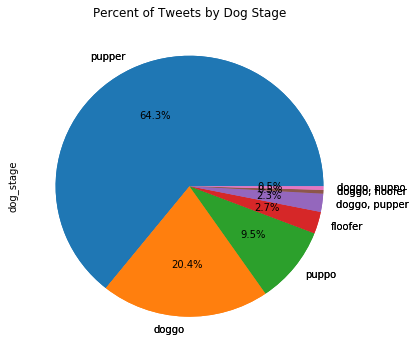

In [101]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
labels = np.full(len(dog_twitter_none.dog_stage.value_counts()), "", dtype=object)
fig, ax = plt.subplots(figsize=(6, 6))
x= dog_twitter_none['dog_stage'].value_counts()
labels = ['pupper', 'doggo','puppo','floofer','doggo, pupper','doggo, floofer','doggo, puppo']
ax.pie(x, labels=labels, autopct='%.1f%%')
ax.set_title('Percent of Tweets by Dog Stage')
dog_twitter_none.dog_stage.value_counts().plot(kind="pie", labels=labels)